In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import special

%matplotlib inline

Define some useful constants

In [52]:
h = 6.626E-34  # [m^2*g/s]
c = 3E8  # [m/s]
k = 1.38E-23  # [J/K]

Problem 1
--

Download the spectrum data, change wavelength to frequency (since that's what's most useful for our caclculations), and plot

In [101]:
data = np.loadtxt('m82spec.dat', skiprows = 1)
wavelength = data[:,0]
M82nu = c/(wavelength*1E-6)
Lnu = data[:,1]
sigmaLnu = data[:,2]

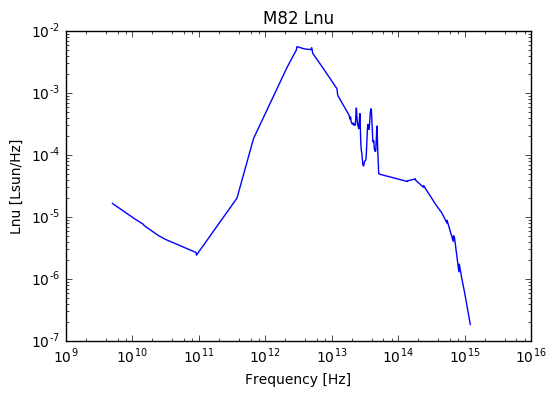

In [102]:
plt.figure(0)
plt.plot(M82nu, Lnu)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Lnu [Lsun/Hz]')
plt.title('M82 Lnu')

Problem 2
--

In [55]:
simLambda = np.array([])
for i in range (0, chunkSize):
    simLambda = np.hstack(simLambda, starburstData[i*chunkSize:(i + 1)*chunkSize]

SyntaxError: invalid syntax (<ipython-input-55-fc603500f668>, line 3)

In [95]:
starburstData = np.loadtxt('m82-1.spectrum1', skiprows=6)
chunkSize = np.where(starburstData[:,0]==.20100E+07)[0][0]
simLambda = starburstData[:chunkSize, 1]
simNu = c/(simLambda*1E-10)
simLstellar = 10**starburstData[:chunkSize, 3]
simLtotal = starburstData[:chunkSize, 2]

I ran a sim on satarburst99 with everything set to default and the star formation as instantaneous (makes sense since people apparently refer to M82 as the "prototypical starburst galaxy"). M = $10^6$M$_{solar}$

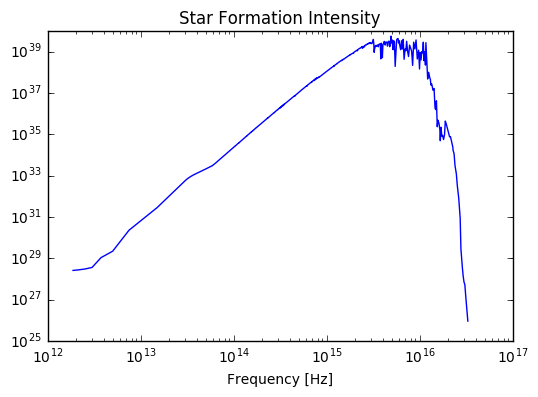

In [96]:
plt.figure(9)
plt.plot(simNu, simLstellar)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.title('Star Formation Intensity')

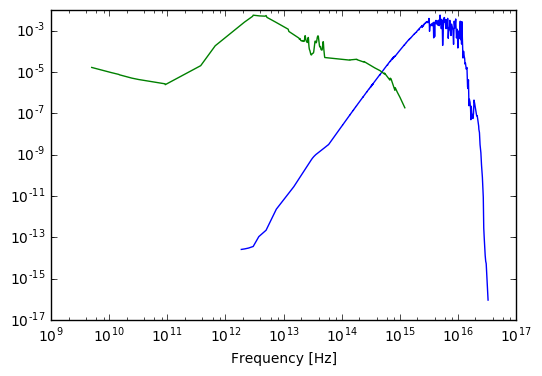

In [97]:
plt.figure(10)
plt.plot(simNu, 1E-42*simLstellar)
plt.plot(M82nu, Lnu)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')

So we need to shift this over. Looking ahead we know this must be the radiative process that fills in the section of the M82 spectrum between synchotron and dust.

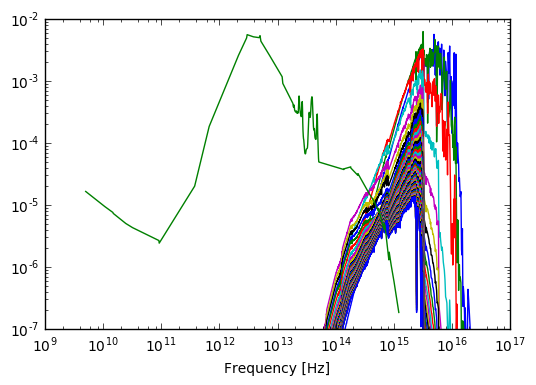

In [98]:
plt.figure(11)
for i in range(0,len(starburstData)/chunkSize):
    tempNu = c/(starburstData[i*chunkSize:(i + 1)*chunkSize, 1]*1E-10)
    tempMag = 1E-42*(10**starburstData[i*chunkSize:(i + 1)*chunkSize, 3])
    plt.plot(tempNu, tempMag)
plt.plot(M82nu, Lnu)
plt.xscale('log')
plt.yscale('log')
plt.ylim((1E-7, 1E-2))
plt.xlabel('Frequency [Hz]')

So it looks like none of the other data chunks corresponding to different times shift it down. I bet this is because the mass was WAY smaller than the actual mass of M82 (~50 GM$_{solar}$). Let's try with a more accurate mass, i.e. the correct mass of ~50 GM$_{solar}$.

In [103]:
starburstData2 = np.loadtxt('m82-2.spectrum1', skiprows=6)
chunkSize2 = np.where(starburstData2[:,0]==.20100E+07)[0][0]
simLambda2 = starburstData2[:chunkSize2, 1]
simNu2 = c/(simLambda2*1E-10)
simLstellar2 = 10**starburstData2[:chunkSize2, 3]
simLtotal2 = starburstData2[:chunkSize2, 2]

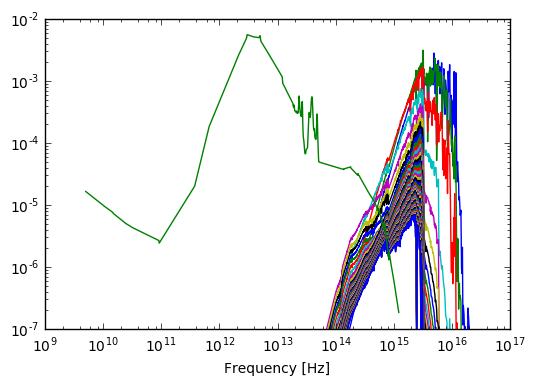

In [109]:
plt.figure(11)
for i in range(0,len(starburstData2)/chunkSize2):
    tempNu2 = c/(starburstData2[i*chunkSize2:(i + 1)*chunkSize2, 1]*1E-10)
    tempMag2 = 1E-47*(10**starburstData2[i*chunkSize2:(i + 1)*chunkSize2, 3])
    plt.plot(tempNu2, tempMag2)
plt.plot(M82nu, Lnu)
plt.xscale('log')
plt.yscale('log')
plt.ylim((1E-7, 1E-2))
plt.xlabel('Frequency [Hz]')

Darn, that didn't move the peak down in frequency...

Problem 3
--

To get the dust component we're going to need a few calculations. Let's define some functions that will spit out the parts of Snu we need.

In [57]:
def Bnu_spectrum(T, nu):
    Bnu = 2*h*nu**3/c**2/(np.exp(h*nu/(k*T)) - 1)
    return Bnu

In [58]:
def kappa(Qabs, a, rho):
    kappanu = 3*Qabs/4/a/rho
    return kappanu

In [59]:
def dust_spectrum(Mdust, D, kappanu, Tdust, nu):
    Snu = Mdust/D**2*kappanu*Bnu_spectrum(T, nu)
    return Snu

So after some fiddling I have discovered that T = 200 K is a pretty good dust temperature

(1e-31, 1e-11)

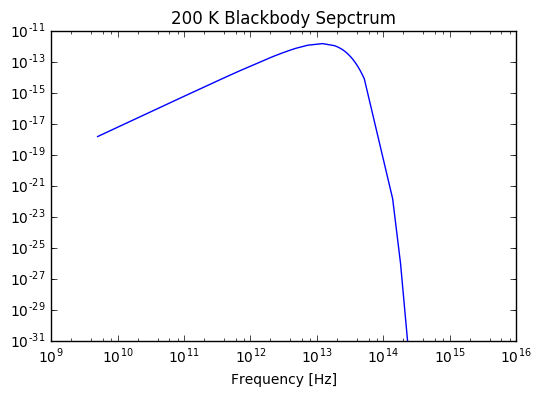

In [99]:
T = 200
BB = Bnu_spectrum(T, M82nu)
plt.figure(1)
plt.plot(M82nu, BB)
plt.xscale('log')
plt.yscale('log')
plt.title(str(T) + ' K Blackbody Sepctrum')
plt.xlabel('Frequency [Hz]')
plt.ylim(1E-31, 1E-11)

Import the PAH spectrum data. I just copied the Qabs for the first chunk in the data corresponding to $r_{dust} \sim 3.5 \times 10^{-4} ~\mu$m

In [61]:
PAHdata = np.loadtxt('PAHion_30_set1.txt', skiprows=2)
nu = c/(PAHdata[:,0]*1E-6)
Qabs = PAHdata[:,2]

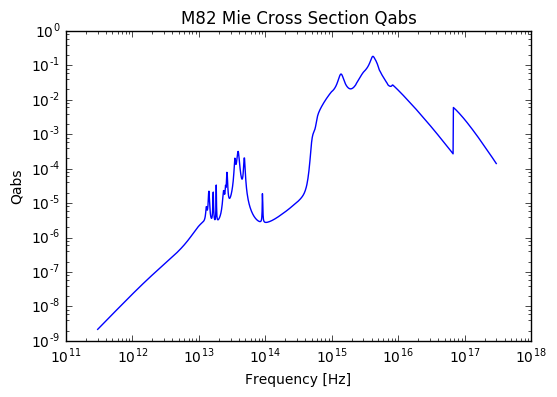

In [62]:
plt.figure(2)
plt.plot(nu, Qabs)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Qabs')
plt.title('M82 Mie Cross Section Qabs')

Right, so we need to get $\rho$ for M82. https://www.astro.umd.edu/~richard/ASTRO620/A620_2015_dust.pdf suggests that $M_{dust}/M_{gal}$ ~ 0.01 so we need the rough size of M82 so get $\rho$.

$\rho = 0.01\frac{3 M_{M82}}{4 \pi r_{M82}^3}$

We have $M_{M82}$ ~ 50 GM$_{solar}$, $r_{M82}$~ 18.5 klyr

In [63]:
Msolar = 1.9E30 # [kg]
lyr = 9.5E15  # [m]
rho = 50E9*Msolar/(4/3*np.pi*(18.5E3*lyr)**3)*.01 # [kg/m^3]
Mdust = .01*50E9*Msolar # [kg]

In [64]:
Mdust

9.500000000000001e+38

In [65]:
rho

5.570417307242375e-23

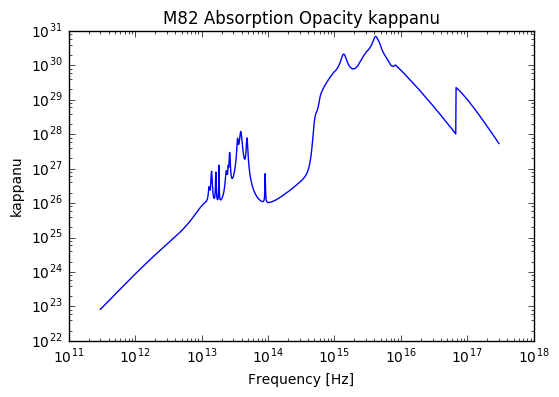

In [66]:
a = 3.548E-4*1E-6  # [m]
kappanu = kappa(Qabs, a, rho)
plt.figure(3)
plt.plot(nu, kappanu)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('kappanu')
plt.title('M82 Absorption Opacity kappanu')

Let's plot this spectrum over the M82 observed

/home/logan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


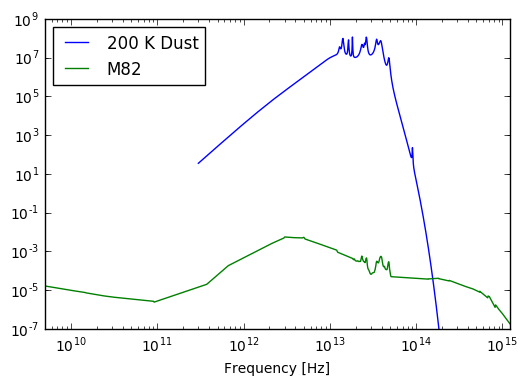

In [67]:
D = 11.4*1E6*lyr  # [m]
T = 200 # [K]
Snu = dust_spectrum(Mdust, D, kappanu, T, nu)
plt.figure(4)
plt.plot(nu, Snu)
plt.plot(M82nu, Lnu)
plt.xscale('log')
plt.yscale('log')
plt.ylim((1E-7, 1E9))
plt.xlim((M82nu[-1], M82nu[0]))
plt.xlabel('Frequency [Hz]')
plt.legend((str(T) + ' K Dust', 'M82'), loc = 'upper left')

Right, so basically all of these spectra will need rescaling etc. to get it to match. Lets just find things so the rough shape matches the M82 $L_\nu$ data. Most of the rescaling is just units and the shape is really what we care about. I.e. where does each type of emission dominate.

/home/logan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


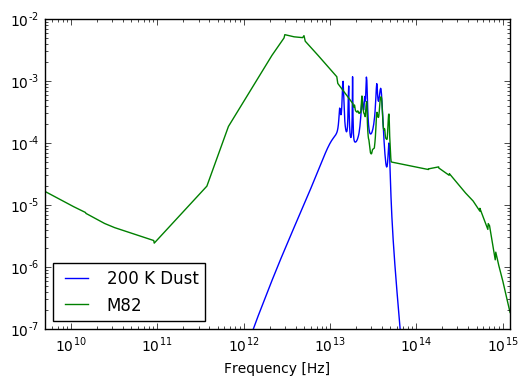

In [68]:
D = 11.4*1E6*lyr  # [m]
T = 200 # [K]
Snu = dust_spectrum(Mdust*1E-11, D, kappanu, T, nu)
plt.figure(4)
plt.plot(nu, Snu)
plt.plot(M82nu, Lnu)
plt.xscale('log')
plt.yscale('log')
plt.ylim((1E-7, 1E-2))
plt.xlim((M82nu[-1], M82nu[0]))
plt.xlabel('Frequency [Hz]')
plt.legend((str(T) + ' K Dust', 'M82'), loc = 'lower left')

Problem 4
--

In [69]:
q = 1.6E-19  # [C]
me = 9.1E-31 # [kg]

In [70]:
def synchotron(nu, C, B, p, alpha):
    P = np.sqrt(3.)*q**2*C*B*np.sin(alpha)/(2.*np.pi*me*c**2*(p + 1.))*scipy.special.gamma(p/4. + 19/12.)*scipy.special.gamma(p/4. - 1/12.)*((me*c*2.*np.pi*nu/(3.*q*B*np.sin(alpha))))**(-(p - 1.)/2.)
    return P

I'm going to use C as my tuning paramter to get the amplitude right. The rest of the values for B, p, and $\alpha$ are the best I could get after some tweaking.

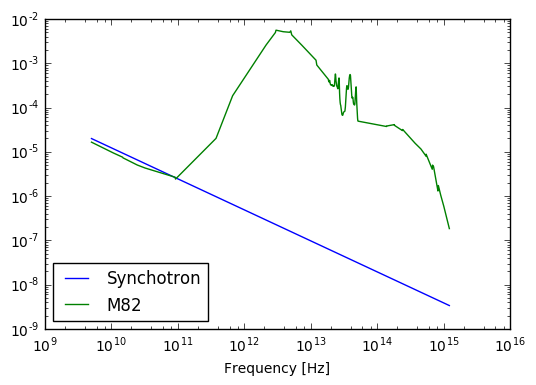

In [71]:
C = 5E25
B = 1
p = 2.4
alpha = np.pi/2
Psynchotron = synchotron(M82nu, C, B, p, alpha)
plt.figure(5)
plt.plot(M82nu, Psynchotron)
plt.plot(M82nu, Lnu)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.legend(('Synchotron', 'M82'), loc = 'lower left')

Problem 5
--

In [72]:
def bremsstrahlung(nu, T, Z, ne, ni, gff):
    P = 2**5*np.pi*q**6/(3*me*c**3)*np.sqrt(2*np.pi/(3*k*me))*1/np.sqrt(T)*Z**2*ne*ni*np.exp(-h*nu/(k*T))*gff
    return P

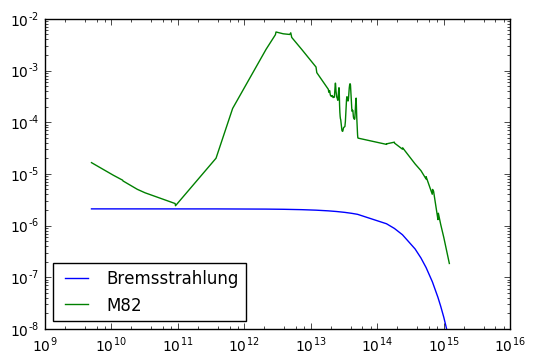

In [85]:
T = 1E4
Z = 1
ne = 1.5E38
ni = ne
gff = 1
Pbremsstrahlung = bremsstrahlung(M82nu, T, Z, ne, ni, gff)
plt.figure(6)
plt.plot(M82nu, Pbremsstrahlung)
plt.plot(M82nu, Lnu)
plt.xscale('log')
plt.yscale('log')
plt.ylim((1E-8, 1E-2))
plt.legend(('Bremsstrahlung', 'M82'), loc = 'lower left')

We need the low $\nu$ tail of Brem to be under the synchotron portion of the observed spectra and have the right roll off at high $\nu$.

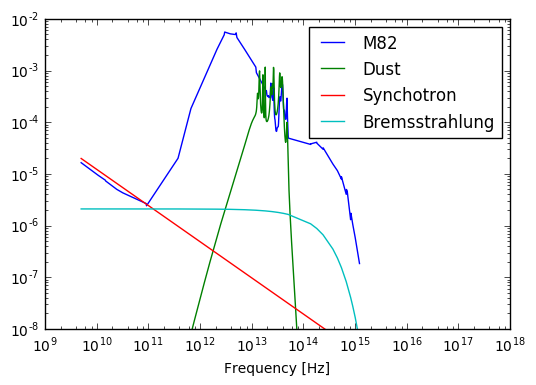

In [78]:
#totalSpectrum = Snu*Psynchotron*Pbremsstrahlung
plt.figure(7)
plt.plot(M82nu, Lnu)
plt.plot(nu, Snu)
plt.plot(M82nu, Psynchotron)
plt.plot(M82nu, Pbremsstrahlung)
plt.xscale('log')
plt.yscale('log')
plt.ylim((1E-8, 1E-2))
plt.xlabel('Frequency [Hz]')
plt.legend(('M82', 'Dust', 'Synchotron', 'Bremsstrahlung'), loc = 'upper right')